In [1]:
import pandas as pd
import numpy as np

C:\Users\aksha\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv("C:\AI Program\Salary_Data.csv")

In [3]:
df

YearsExperience  Salary
0               1.1   39343
1               1.3   46205
2               1.5   37731
3               2.0   43525
4               2.2   39891
5               2.9   56642
6               3.0   60150
7               3.2   54445
8               3.2   64445
9               3.7   57189
10              3.9   63218
11              4.0   55794
12              4.0   56957
13              4.1   57081
14              4.5   61111
15              4.9   67938
16              5.1   66029
17              5.3   83088
18              5.9   81363
19              6.0   93940
20              6.8   91738
21              7.1   98273
22              7.9  101302
23              8.2  113812
24              8.7  109431
25              9.0  105582
26              9.5  116969
27              9.6  112635
28             10.3  122391
29             10.5  121872

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [5]:
import matplotlib.pyplot as plt

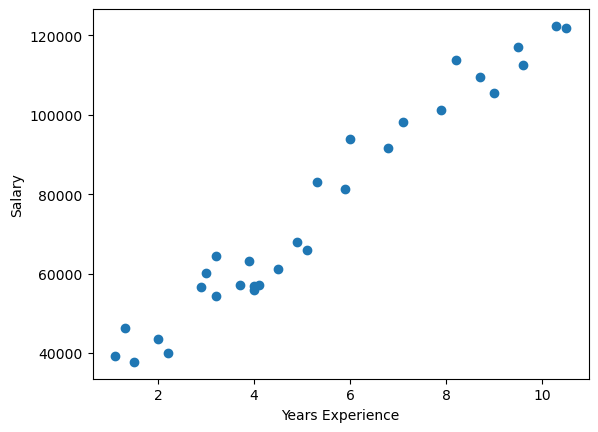

In [6]:
plt.scatter(x=df["YearsExperience"],y=df["Salary"])
plt.xlabel("Years Experience")
plt.ylabel("Salary")
plt.show()

In [7]:
correlation=df.corr()

In [8]:
import seaborn as sns

<Axes: >

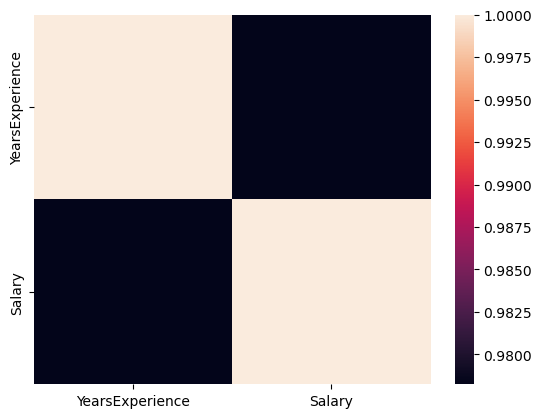

In [9]:
sns.heatmap(correlation)

In [10]:
x=df.iloc[:,:-1].values

In [11]:
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [12]:
y=df.iloc[:,1].values

In [13]:
y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872], dtype=int64)

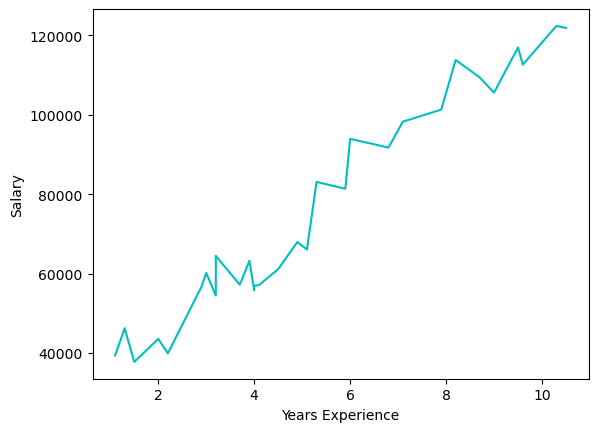

In [14]:
plt.plot(x,y,'c')
plt.xlabel("Years Experience")
plt.ylabel("Salary")
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [16]:
X_train, X_test, y_train, y_test=train_test_split(x,y, test_size=1/3)

In [17]:
X_train.shape

(20, 1)

In [18]:
X_test.shape

(10, 1)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model = LinearRegression()

In [21]:
# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [22]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [23]:
### y=mx+c
model.intercept_

26508.726652821046

In [24]:
model.coef_

array([9364.95188647])

In [25]:
### R-Squared
print('R-squared:', metrics.r2_score(y_test, y_pred))

R-squared: 0.955754496899953


In [26]:
### Mean Squared Error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 32622835.520152442


In [27]:
### Mean Absolute Error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4957.32031152648


In [28]:
### Root mean squared error
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',rmse)

Root Mean Squared Error: 5711.640352836691


In [29]:
data1_x_test=pd.DataFrame(X_test,columns=["Experience"])
data1_y_test=pd.DataFrame(y_test,columns=["Salary"])
data1_y_pred=pd.DataFrame(y_pred,columns=["Prediction"])
data1_diff=data1_y_test-data1_y_pred
y_test_pred=pd.concat([data1_x_test,data1_y_test,data1_y_pred],axis=1)
y_test_pred['Difference']=y_test_pred["Salary"]-y_test_pred["Prediction"]

In [30]:
y_test_pred

Experience  Salary     Prediction    Difference
0         3.2   54445   56476.572690  -2031.572690
1         3.0   60150   54603.582312   5546.417688
2         4.9   67938   72396.990897  -4458.990897
3         1.5   37731   40556.154483  -2825.154483
4         9.5  116969  115475.769574   1493.230426
5         1.1   39343   36810.173728   2532.826272
6         4.0   56957   63968.534199  -7011.534199
7         2.2   39891   47111.620803  -7220.620803
8         9.0  105582  110793.293631  -5211.293631
9         6.0   93940   82698.437972  11241.562028

In [31]:
y_pred_final=pd.DataFrame(data1_y_pred,columns=["Prediction"])

In [32]:
y_pred_final

Prediction
0   56476.572690
1   54603.582312
2   72396.990897
3   40556.154483
4  115475.769574
5   36810.173728
6   63968.534199
7   47111.620803
8  110793.293631
9   82698.437972

In [33]:
result=pd.concat([df,y_pred_final],axis=1)
result

YearsExperience  Salary     Prediction
0               1.1   39343   56476.572690
1               1.3   46205   54603.582312
2               1.5   37731   72396.990897
3               2.0   43525   40556.154483
4               2.2   39891  115475.769574
5               2.9   56642   36810.173728
6               3.0   60150   63968.534199
7               3.2   54445   47111.620803
8               3.2   64445  110793.293631
9               3.7   57189   82698.437972
10              3.9   63218            NaN
11              4.0   55794            NaN
12              4.0   56957            NaN
13              4.1   57081            NaN
14              4.5   61111            NaN
15              4.9   67938            NaN
16              5.1   66029            NaN
17              5.3   83088            NaN
18              5.9   81363            NaN
19              6.0   93940            NaN
20              6.8   91738            NaN
21              7.1   98273            NaN
22              7.9  101302            NaN
23              8.2  113812            NaN
24              8.7  109431            NaN
25              9.0  105582            NaN
26              9.5  116969            NaN
27              9.6  112635            NaN
28             10.3  122391            NaN
29             10.5  121872            NaN

In [34]:
acc=metrics.r2_score(y,data1_y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [30, 10]

In [ ]:
acc

In [35]:
model.predict([[5]])

array([73333.48608515])